In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Assuming darwin.maize data is available as a CSV file
dat = pd.read_csv('../data/01-darwin_maize.csv')

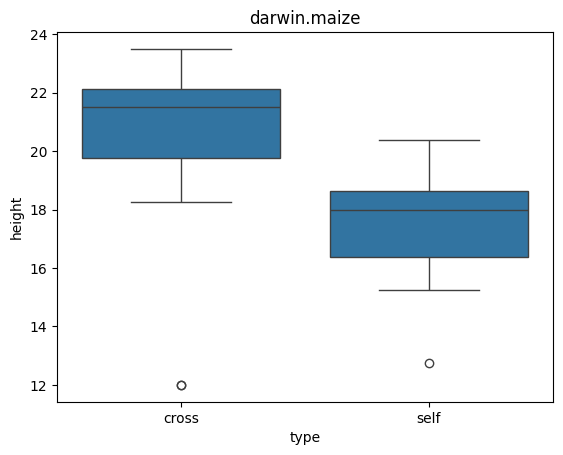

In [3]:
# Box-and-whisker plot with seaborn
sns.boxplot(x='type', y='height', data=dat)
plt.title("darwin.maize")
plt.show()



In [4]:
# We first need some data cleaning and reshaping
dm = pd.melt(dat, id_vars=['pot', 'pair', 'type'], value_vars = 'height')
dm
d2 = dm.pivot_table(index=['pot', 'pair'], columns='type', values='value').reset_index()
d2['diff'] = d2['cross'] - d2['self']
stats.ttest_1samp(d2['diff'], 0)



TtestResult(statistic=np.float64(2.1479874613311205), pvalue=np.float64(0.0497029440218009), df=np.int64(14))

In [5]:
# Same as
model = ols('height ~ pair + type', data=dat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                 -0.100
Method:                 Least Squares   F-statistic:                    0.8243
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.643
Time:                        17:59:23   Log-Likelihood:                -67.281
No. Observations:                  30   AIC:                             166.6
Df Residuals:                      14   BIC:                             189.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.7458      2.436      8.925   

In [8]:
# Note this is different, as it assumes independent samples:
stats.ttest_ind(d2['cross'], d2['self'], equal_var=True)

TtestResult(statistic=np.float64(2.4371126507178857), pvalue=np.float64(0.021414483690033823), df=np.float64(28.0))

In [7]:
# Are pots significantly different? Answer: no
sm.stats.anova_lm(ols('diff ~ pot', data=d2).fit())

,df,sum_sq,mean_sq,F,PR(>F)
pot,3.0,44.692448,14.897483,0.613876,0.620091
Residual,11.0,266.947135,24.267921,NaN,NaN


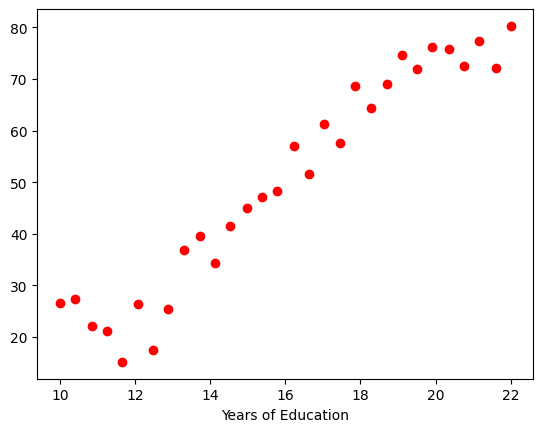

In [14]:
# Example 2: Studying relationship between variables
# Load the Income data from Chapter 2 of ISLR
# income and years of education for 30 individuals
dat2 = pd.read_csv('../data/01-Income.csv')

plt.scatter(dat2['Education'], dat2['Income'], color='red')
plt.xlabel("Years of Education")
plt.show()

# The plot suggests that one might be able to predict income using years of education.
# But what is the function that connects the input variable to the output?

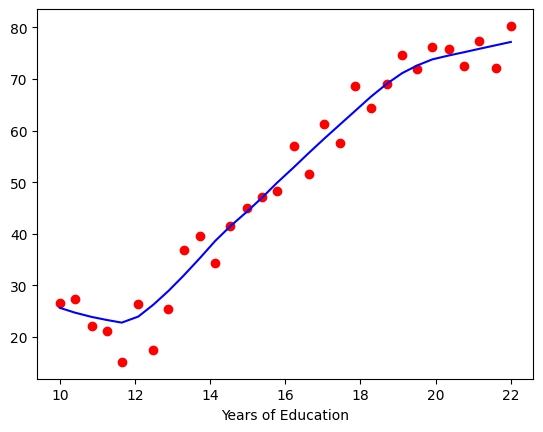

In [15]:
# Fit a LOESS curve
lowess = sm.nonparametric.lowess
w = lowess(dat2['Income'], dat2['Education'], frac=1/3)

# Plot the results
plt.scatter(dat2['Education'], dat2['Income'], color='red')
plt.plot(w[:, 0], w[:, 1], color='blue')
plt.xlabel("Years of Education")
plt.show()